['Quantity', 'Weight', 'WorkCode_L2903', 'WorkCode_L3092', 'WorkCode_T3940', 'WorkCode_T3941', 'WorkCode_T3942', 'WorkCode_T3943', 'WorkCode_T3944', 'WorkCode_T3945', 'ResourceGroupCode_D349201', 'ResourceGroupCode_R39402', 'ResourceGroupCode_T29391', 'ResourceCode_L3092', 'ResourceCode_M23141', 'ResourceCode_M3241', 'ResourceCode_M34211', 'ResourceCode_M34212', 'ResourceCode_M34213', 'ResourceCode_P231231', 'ResourceCode_P231232', 'ResourceCode_P231233', 'ResourceCode_P302012', 'ResourceCode_R0032', 'ResourceCode_R0033', 'ResourceCode_R0034', 'ResourceCode_R0035', 'ResourceCode_R1211', 'ResourceCode_R1212', 'ResourceCode_R1213', 'ResourceCode_R1214', 'ResourceCode_R2039', 'ResourceCode_R2040', 'ResourceCode_R2041', 'ResourceCode_R2042', 'ResourceCode_R9942', 'ResourceCode_R9943', 'ResourceCode_R9944', 'ResourceCode_R9945', 'ResourceCode_R9946', 'ResourceClassification_F', 'ResourceClassification_L', 'ResourceClassification_M']
[1.80206669e+06 2.34749537e+07 4.49899936e+06 3.33022157e+

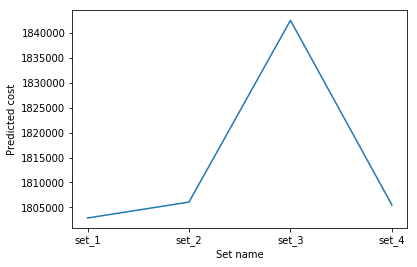

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import datetime
from sklearn.tree import export_graphviz
import pydot
from subprocess import call
from IPython.display import Image
from numpy import asarray
from numpy import savetxt
%matplotlib inline

features = pd.read_csv('mldata3.csv')
# features.head(5)

features = pd.get_dummies(features)
# features.head(5)

labels = np.array(features['Cost'])
features = features.drop('Cost', axis=1)
feature_list = list(features.columns)
features = np.array(features)

# features
# train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.25, random_state=42)

test = pd.read_csv('test.csv')
testTemp = pd.read_csv('test.csv')
# print(testTemp)

testArr = np.array(testTemp)
# print(testArr)
# print(testArr.shape)

test = pd.get_dummies(test)
test_labels = np.array(test['Cost'])
test = test.drop('Cost', axis=1)
test_list = list(test.columns)
print(test_list)
test = np.array(test)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(features, labels)

predictions = rf.predict(test)
predictions
final = np.array(predictions)
print(final)
print(final.shape)
print(final.size)
# final = np.reshape(-1, final.size)

# np.append(testArr, final[:, -1:], axis=1)
# print(final[:, -1:])
# result = np.vstack((testArr, final[:, -1:]))
# print("Appended? ", testArr)
# 'M' 'M' 'M' 'M' 'M' 'L' 'L' 'L' 'L' 'F' 'F' 'F' 'M' 'M' 'L' 'L' 'L' 'L' 'F' 'F' 'M' 'L' 'L' 'F' 'F']
rClassif = np.array(testTemp['ResourceClassification'])

# ['D349201' 'R39402' 'T29391']
resourceGroup = np.array(testTemp['ResourceGroupCode'])
resourceGroup = np.unique(resourceGroup)

resourceCost = final[0] + final[1] + final[2] + final[3] + final[4]
machineCost = final[9]

set_1 = final[0] + final[7] + final[10]
print("set_1 ", set_1)

set_2 = final[0] + final[6] + final[10]
print("set_2 ", set_2)

set_3 = final[0] + final[5] + final[10]
print("set_3 ", set_3)

set_4 = final[0] + final[8] + final[10]
print("set_4 ", set_4)

plt.plot(["set_1", "set_2", "set_3", "set_4"],[set_1, set_2, set_3, set_4])
plt.xlabel("Set name")
plt.ylabel("Predicted cost")

# # plt.style.use('ggplot')
# x = ["set_1", "set_2", "set_3", "set_4"]
# y =[set_1, set_2, set_3, set_4]
# 
# fig, ax = plt.subplots()
# ax.scatter(x, y)
# for i, txt in enumerate(y):
#     ax.annotate(txt, (x[i], y[i]))

plt.savefig('/Users/chaiwonpark/PycharmProjects/machineLearning/graph2.png')
